Hw4, name: Jorge Monzon Diaz, email: jorgemd503@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Problem 1a

$$f_m(s)=\int_{0}^{1} f_{m-1}(s-x)$$

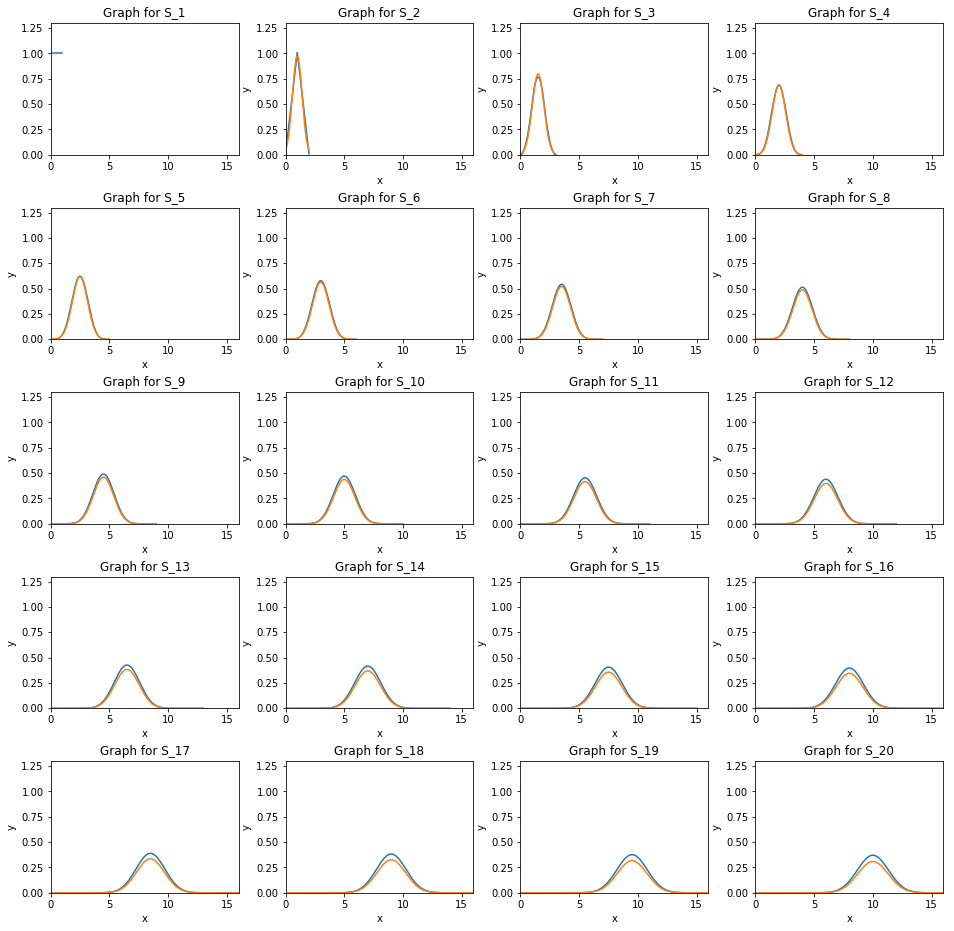

In [2]:
## Problem 1b and 1c
# Convolution (Add n random variables together)
plt.subplots(5, 4,figsize=(16,16)) #initialize subplots
plt.subplots_adjust(hspace = .4, wspace = .25)


#Base case
plt.subplot(5,4,1)
plt.title('Graph for S_1')
plt.axis([0,16,0,1.3])

pdf=np.ones((101)) #define unif pdf
values=np.ones((101)) #initialize f(x) values, f_1
x=np.linspace(0,1,num=len(values)) #define x values 1/100,2/100,etc
plt.plot(x,values)

for i in range(2,21):
    plt.subplot(5,4,i) #plot i'th subplot and set its properties
    plt.title('Graph for S_' + str(i))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([0,16,0,1.3])
    
    values=np.convolve(pdf,values,mode='full')*1/100 #recursively set and convolve the pdf with the previous y-values
    x = np.linspace(0,i,num=len(values)) #set x-values 1/100,2/100,...,i
    plt.plot(x,values)
    
    #calculate the analytic mean and variance
    mean = i*.5
    var=i*1/12
    yvals=1/(np.sqrt(2 * np.pi * var)) * np.exp( - (x - mean)**2 / (2 * var) ) #plug E[x] and Var[x] into normal distribution
    
    plt.plot(x,yvals) #plot 1/100,2/100,... as x and the points computed for the normal distibrution as y
    
plt.show()

Problem 1c

You can find the analytic mean and variance for each $f_m$ by using the uniform pdf for $U(0,1) \sim \frac{1}{(1-0)}$ and computing its expectation and variance.

By linearity of expectation $E[X_1]+E[X_2]+...+E[X_m]=mE[X_1]$

So for $X_m \sim U(0,1): E[\sum X_m]=m*\frac{1}{2}*(0+1)$

And $Var[\sum X_m]=m*\frac{1}{12}*(1-0)^2$

Next, by the CLT stating that for $n \to \infty, \sum X_m \sim N(\frac{m}{2},\frac{m}{12})$

These graphs prove the convergence between the sums of m indepedent r.v.s and the gaussian distribution for $m \to \infty$, it is clear graphically that the approximated pmf and the analytic pmf converge (orange line is approximate, blue line is analytic).

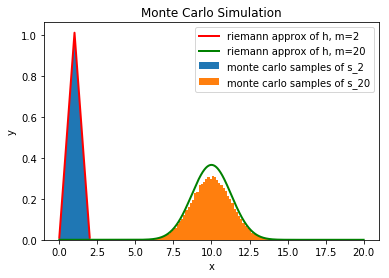

In [3]:
## Problem 1d

numrv=[2,20] #make array to hold m=2,m=20 (only need this to use a for loop instead of rewriting code twice)

for i in range(2):
    
    x=np.random.rand(100000,numrv[i]) #generate 1e5 x m array of rv
    data=np.sum(x,axis=1) #compute sum of rows to obtain 1e5 x 1 size array for the sum of m rv

    #make histogram for 1e5 samples with 75 bins
    plt.hist(data,75,density='true',label='monte carlo samples of s_'+str(numrv[i]))

pdf=np.ones((101))
#graph h, m=2
values=np.convolve(pdf,np.ones((101)),mode='full')*1/100 #find y values for two U(0,1) rv by convolving unif pdf with f_1
x = np.linspace(0,2,num=len(values)) #x=1/100,2/100,...,2
plt.plot(x,values,label='riemann approx of h, m=2', linewidth=2, color='r')

#graph h, m=20
for i in range(2,21):
    values=np.convolve(pdf,values,mode='full')*1/100 #recursively set and convolve the pdf with the previous y-values
    x = np.linspace(0,i,num=len(values)) #x=1/100,2/100,...,i

#for loop ends when m=20, therefore simply plot x and y after computing y-values for m=20
plt.plot(x,values,label='riemann approx of h, m=20', linewidth=2, color='g')
    
#miscellaneous plot settings
plt.xlabel('x')
plt.ylabel('y')
plt.title('Monte Carlo Simulation')
plt.legend()
plt.show()